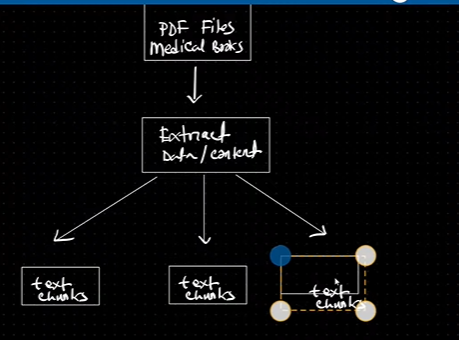

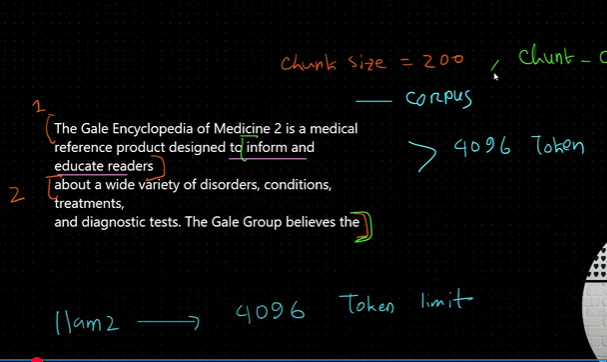

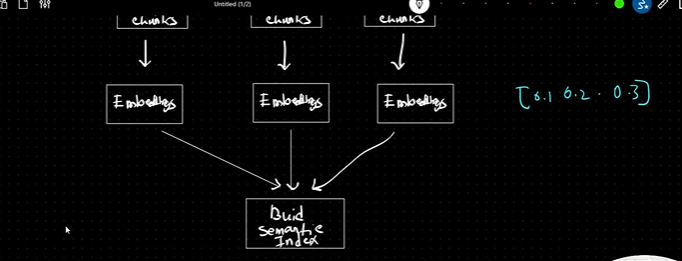

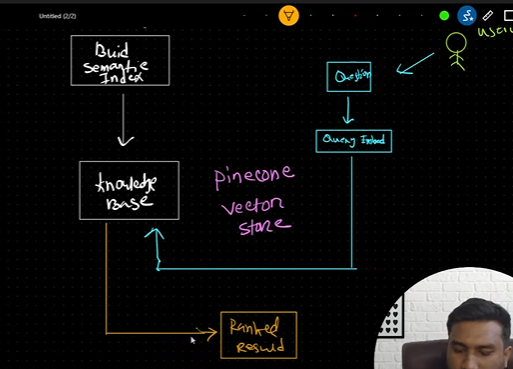

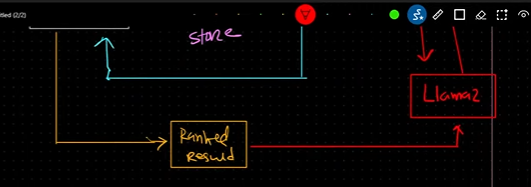

In [1]:
from langchain import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.embeddings import HuggingFaceEmbeddings
# from langchain.vectorstores import Pinecone
import pinecone
from pinecone import Pinecone, ServerlessSpec
from langchain_pinecone import PineconeVectorStore # To connect with the Vectorstore
from langchain.document_loaders import PyMuPDFLoader, DirectoryLoader , PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import CTransformers
from langchain.prompts import PromptTemplate

d:\a27_YEARS_OLD\mdical_chatbot\venv\Lib\site-packages\pinecone\data\index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
def load_pdf_dir(data_dir):
    loader = DirectoryLoader(data_dir, glob='*.pdf', loader_cls=PyPDFLoader)
    documents = loader.load()
    return documents

In [3]:
extracted_data = load_pdf_dir('../data/')

In [23]:
extracted_data[:5]

[Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 0}, page_content=''),
 Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 1}, page_content='The GALE\nENCYCLOPEDIA of\nMEDICINE\nTHIRD EDITION'),
 Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 2}, page_content='The GALE\nENCYCLOPEDIA of\nMEDICINE\nTHIRD EDITION\nVOLUME\n\x81\n1\nA-B\nJACQUELINE L. LONGE, PROJECT EDITOR\n'),
 Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 3}, page_content='The GALE\nENCYCLOPEDIA of\nMEDICINE\nTHIRD EDITION\nVOLUME\n\x81\n2\nC-F\nJACQUELINE L. LONGE, PROJECT EDITOR\n'),
 Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 4}, page_content='The GALE\nENCYCLOPEDIA of\nMEDICINE\nTHIRD EDITION\nVOLUME\n\x81\n3\nG-M\nJACQUELINE L. LONGE, PROJECT EDITOR\n')]

In [4]:
print(f"Total Documents loaded: {len(extracted_data)}")

Total Documents loaded: 4505


In [5]:
type(extracted_data[24])

langchain_core.documents.base.Document

In [6]:
# we can convert the Document object to a python dict using the .dict() method.
print(f"keys associated with a Document: {extracted_data[0].dict().keys()}")

keys associated with a Document: dict_keys(['id', 'metadata', 'page_content', 'type'])


C:\Users\lenovo\AppData\Local\Temp\ipykernel_20996\2044994839.py:2: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  print(f"keys associated with a Document: {extracted_data[0].dict().keys()}")


In [7]:
def text_split(extracted_data):
    text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1024, chunk_overlap = 20)
    text_chunks = text_splitter.split_documents(extracted_data)

    return text_chunks

In [8]:
text_chunks = text_split(extracted_data)
print('length of my chunk:', len(text_chunks))

length of my chunk: 20207


In [9]:
len(extracted_data)

4505

In [10]:
text_chunks[:20]

[Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 1}, page_content='The GALE\nENCYCLOPEDIA of\nMEDICINE\nTHIRD EDITION'),
 Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 2}, page_content='The GALE\nENCYCLOPEDIA of\nMEDICINE\nTHIRD EDITION\nVOLUME\n\x81\n1\nA-B\nJACQUELINE L. LONGE, PROJECT EDITOR'),
 Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 3}, page_content='The GALE\nENCYCLOPEDIA of\nMEDICINE\nTHIRD EDITION\nVOLUME\n\x81\n2\nC-F\nJACQUELINE L. LONGE, PROJECT EDITOR'),
 Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 4}, page_content='The GALE\nENCYCLOPEDIA of\nMEDICINE\nTHIRD EDITION\nVOLUME\n\x81\n3\nG-M\nJACQUELINE L. LONGE, PROJECT EDITOR'),
 Document(metadata={'source': '..\\data\\Encyclopedia_of_Medicine.pdf', 'page': 5}, page_content='The GALE\nENCYCLOPEDIA of\nMEDICINE\nTHIRD EDITION\nVOLUME\n\x81\n4\nN-S\nJACQUELINE L. LONGE, PROJECT EDITOR'),
 Doc

In [11]:
from sentence_transformers import SentenceTransformer

In [12]:
def download_hugging_face_embeddings():
    embeddings = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    return embeddings

In [13]:
embeddings = download_hugging_face_embeddings()

In [28]:
def download_hugging_face_embeddings2():
    embeddings2 = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    return embeddings2

In [29]:

embeddings2 = download_hugging_face_embeddings2()

In [30]:
embeddings2

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [14]:
embeddings

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [15]:
query_result = embeddings.encode("Hello world")
print(len(query_result))

384


In [16]:
query_result

array([-3.44772749e-02,  3.10231782e-02,  6.73497003e-03,  2.61089858e-02,
       -3.93620245e-02, -1.60302445e-01,  6.69240132e-02, -6.44148979e-03,
       -4.74504791e-02,  1.47588560e-02,  7.08752796e-02,  5.55276312e-02,
        1.91933345e-02, -2.62513123e-02, -1.01095429e-02, -2.69404557e-02,
        2.23074611e-02, -2.22266484e-02, -1.49692640e-01, -1.74930077e-02,
        7.67625542e-03,  5.43522425e-02,  3.25439707e-03,  3.17258909e-02,
       -8.46213847e-02, -2.94060130e-02,  5.15956134e-02,  4.81240600e-02,
       -3.31482221e-03, -5.82791679e-02,  4.19692732e-02,  2.22106855e-02,
        1.28188834e-01, -2.23389715e-02, -1.16563160e-02,  6.29283935e-02,
       -3.28763351e-02, -9.12260413e-02, -3.11753470e-02,  5.26994914e-02,
        4.70348299e-02, -8.42031166e-02, -3.00561991e-02, -2.07448304e-02,
        9.51783545e-03, -3.72179062e-03,  7.34328525e-03,  3.93243879e-02,
        9.32740644e-02, -3.78859648e-03, -5.27420677e-02, -5.80581613e-02,
       -6.86436146e-03,  

In [17]:
import os
from dotenv import load_dotenv
load_dotenv()
PINECONE_API_KEY = os.environ["PINECONE_API_KEY"]
LANGCHAIN_API_KEY = os.environ["LANGCHAIN_API_KEY"]
HF_TOKEN = os.environ["HF_TOKEN"]

In [18]:
os.environ["PINECONE_API_KEY"] = os.environ["PINECONE_API_KEY"]

In [19]:
index_name = "medical-chatbot" #give the name to your index, or you can use an index which you created previously and load that.
#here we are using the new fresh index name
pc = Pinecone(api_key=PINECONE_API_KEY)
#Get your Pinecone API key to connect after successful login and put it here.
pc

In [20]:
import time

In [21]:
if index_name in pc.list_indexes().names():
  print("index already exists" , index_name)
  index= pc.Index(index_name) #your index which is already existing and is ready to use
  print(index.describe_index_stats())

else: #crate a new index with specs
  pc.create_index(
    name=index_name,
    dimension=384, # Replace with your model dimensions
    metric="cosine", # Replace with your model metric
    spec=ServerlessSpec(
            cloud="aws",
            region="us-east-1"
        )
   )
while not pc.describe_index(index_name).status["ready"]:
        time.sleep(1)
        index= pc.Index(index_name)
        print("index created")
        print(index.describe_index_stats())

index already exists medical-chatbot
{'dimension': 384,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}


In [31]:
docsearch = PineconeVectorStore.from_texts([chunk.page_content for chunk in text_chunks], embeddings2, index_name=index_name)

ProtocolError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
# docs_already_in_pinecone = input("Are the vectors already added in DB: (Type Y/N)")
# # check if the documents were already added to the vector database
# if docs_already_in_pinecone == "Y" or docs_already_in_pinecone == "y":
#    docsearch = PineconeVectorStore(index_name=INDEX_NAME, embedding=embeddings)
#    print("Existing Vectorstore is loaded")
# # if not then add the documents to the vectore db
# elif docs_already_in_pinecone == "N" or docs_already_in_pinecone == "n":
#    docsearch = PineconeVectorStore.from_documents(documents, embeddings, index_name=index_name)
#    print("New vectorstore is created and loaded")
# else:
#    print("Please type Y - for yes and N - for no")

In [34]:
docsearch = PineconeVectorStore.from_existing_index(index_name, embeddings2)

In [35]:
# Using the Vector Store for Retrieval
# Here we are defing how to use the loaded vectorstore as retriver
retriver = docsearch.as_retriever()
retriver.invoke("what is medical allergies ? ")

[Document(id='22bf0087-53ea-4b9b-9116-d4af32ff149f', metadata={}, page_content='Medical Stock Photo. Reproduced by permission.)\n130 GALE ENCYCLOPEDIA OF MEDICINE\nAllergy tests'),
 Document(id='9fbed393-adf6-4b95-9df8-ab40906f288a', metadata={}, page_content='swollen spot develops at the injection site for each\nThis patient is being exposed to certain allergens as part of\nan allergy test. (Custom Medical Stock Photo. Reproduced by\npermission.)\nKEY TERMS\nAllergen— A substance that provokes an allergic\nresponse.\nAnaphylaxis— Increased sensitivity caused by\nprevious exposure to an allergen that can result\nin blood vessel dilation (swelling) and smooth\nmuscle contraction. Anaphylaxis can result in\nsharp blood pressure drops and difficulty\nbreathing.\nAntibody— A specific protein produced by the\nimmune system in response to a specific foreign\nprotein or particle called an antigen.\nAntigen— A foreign protein to which the body\nreacts by making antibodies.\nHistamine— A chemic

In [36]:
docs = docsearch.similarity_search("what is Allergies ? ", k=3)

In [ ]:
# Using metadata as retreiver
# retriever = docsearch.as_retriever(search_kwargs={"filter": {"source": "/content/drive/MyDrive/Data/2310.06625v4.pdf", "page": 0}})
# retriver.invoke(" Flash Transformer ?")

In [37]:
docs

[Document(id='69aac974-1a1d-414d-b6ea-9373f60b646c', metadata={}, page_content='microorganisms, or particles, like pollen or dust, by\nproducing specific proteins, called antibodies, that are\ncapable of binding to identifying molecules, or antigens,\non the foreign particle. This reaction between antibody\nand antigen sets off a series of reactions designed to\nprotect the body from infection. Sometimes, this same\nseries of reactions is triggered by harmless, everyday\nsubstances. This is the condition known as allergy,\nand the offending substance is called an allergen.\nLike all allergic reactions, AR involves a special\nset of cells in the immune system known as mast cells.\nMast cells, found in the lining of the nasal passages\nand eyelids, display a special type of antibody, called\nimmunoglobulin type E (IgE), on their surface. Inside,\nmast cells store reactive chemicals in small packets,\ncalled granules. When the antibodies encounter\nallergens, they trigger release of the g

In [38]:
prompt_template = """
Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know the answer, don't try to make up the answer.

Context:{context}
Question:{question}

Only return the helpful answer below and nothing else.
Helpful answer:
"""

In [39]:
PROMPT = PromptTemplate(template=prompt_template, input_variables=["context", "question"])
chain_type_kwargs = {"prompt": PROMPT}

In [40]:
llm = CTransformers(model="../model/llama-2-7b-chat.ggmlv3.q4_1.bin",
                    model_type="llama",
                    config={'max_new_tokens': 512,
                            'temperature': 0.8}
                   )

In [41]:
qa = RetrievalQA.from_chain_type(llm = llm,
                                 chain_type = 'stuff',
                                 retriever = docsearch.as_retriever(search_kwargs={'k':2}),
                                 chain_type_kwargs = chain_type_kwargs,
                                 return_source_documents=True)

In [ ]:
while True:
    user_input = input(f"input prompt:")
    result=qa({"query":user_input})
    print("Response:",result['result'])